In [90]:
import yfinance as yf 
import datetime 
import pandas as pd 
import numpy as np 
pd.core.common.is_list_like = pd.api.types.is_list_like #
import pandas_datareader as pdr 
yf.pdr_override()
import matplotlib.pyplot as plt

In [91]:
start = datetime.datetime(2017, 1, 1) 
end = datetime.datetime(2018, 1, 1)

In [92]:
def get_tickers():
    f = open('Stocks.txt')
    tickers = []
    for line in f:
        tickers.append(line[0:len(line)-1])
    f.close()
    return tickers

def data_for_ticker(ticker):
    return yf.download([ticker], start=start, end=end)

In [93]:
def generate_frames():
    f = open('Stocks.txt')
    frames = dict()
    for line in f:
        ticker = line[0:len(line)-1]
        frames[ticker] = data_for_ticker(ticker)
    f.close()
    return frames

def get_frame(ticker, frames):
    return frames[ticker]

In [94]:
allTickers = get_tickers()

In [95]:
allFrames = generate_frames()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

In [100]:
def compute_return(frames):
    for ticker in frames:
        frame = frames[ticker]
        pt = frame["Adj Close"][1:].values
        pt_1 = frame["Adj Close"][:-1].values
#         print(pt, pt_1,"/n")
        ret = np.log(pt / pt_1)
        frames[ticker]["Return"] = [np.NaN, *ret]
        
compute_return(allFrames)

In [106]:
def get_return_info(ticker):
    E = np.mean(allFrames[ticker]["Return"])
    sigma = np.std(allFrames[ticker]["Return"])
#     print("E: {}, sigma: {}".format(E, sigma))
    return E, sigma

In [ ]:
returns = []
risks = []
for tick in allTickers:
    ret,risk = get_return_info(tick)
#     print(tick,ret,risk)
    returns.append(ret)
    risks.append(risk)

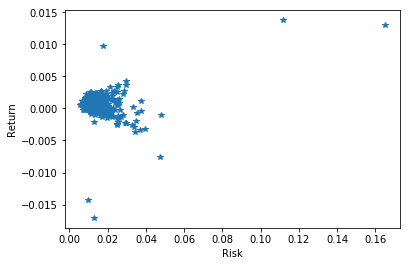

In [110]:
plt.xlabel("Risk")
plt.ylabel("Return")
plt.plot(risks, returns,"*")
plt.show()